# 数据预处理

In [1]:
import h5py
import numpy as np
import tensorflow as tf 
import keras
from keras.layers import Input, Dense, Dropout, Activation, BatchNormalization,concatenate, Flatten, Conv2D, AveragePooling2D, MaxPooling2D
from keras.models import Model
import matplotlib.pyplot as plt
%matplotlib inline


D:\Anaconda\anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# 建立模型

In [2]:
def CNN(input_shape=(200,6,1), classes=16): 
    X_input = Input(input_shape)
    
    f1 = [20, 16, 12, 8]
    f2 = [3, 4, 5, 6]
    convs = []
    
    for i in range(4):
        x = Conv2D(filters=32, kernel_size=(f1[i],3), strides=(1,1), activation='relu',padding='valid')(X_input)
        x = MaxPooling2D((20,1))(x)
        
        x = Conv2D(filters=64, kernel_size=(f2[i],1), strides=(1,1), activation='relu', padding='valid')(x)
        x = MaxPooling2D((9-2-i,1))(x)
        
        x = Flatten()(x)
        convs.append(x)
        
    merge = concatenate(convs,axis=1)
    X = merge
    X = Dropout(0.5)(X)
    X = Dense(128,activation='relu')(X)
    X = Dropout(0.5)(X)
    X = Dense(classes, activation='softmax')(X)
    model = Model(inputs=X_input, outputs=X)
    return model
    
model = CNN()
model.summary()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 200, 6, 1)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 181, 4, 32)   1952        input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 185, 4, 32)   1568        input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_5 (Conv2D)               (None, 189, 4, 32)   1184        input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_7 (

# 画出卷积权重

In [3]:
#model.save_weights('model_weights.h5')
model.load_weights('model_weights.h5')
for i in range(len(model.weights)):
    print(model.weights[i])

<tf.Variable 'conv2d_1/kernel:0' shape=(20, 3, 1, 32) dtype=float32_ref>
<tf.Variable 'conv2d_1/bias:0' shape=(32,) dtype=float32_ref>
<tf.Variable 'conv2d_3/kernel:0' shape=(16, 3, 1, 32) dtype=float32_ref>
<tf.Variable 'conv2d_3/bias:0' shape=(32,) dtype=float32_ref>
<tf.Variable 'conv2d_5/kernel:0' shape=(12, 3, 1, 32) dtype=float32_ref>
<tf.Variable 'conv2d_5/bias:0' shape=(32,) dtype=float32_ref>
<tf.Variable 'conv2d_7/kernel:0' shape=(8, 3, 1, 32) dtype=float32_ref>
<tf.Variable 'conv2d_7/bias:0' shape=(32,) dtype=float32_ref>
<tf.Variable 'conv2d_2/kernel:0' shape=(3, 1, 32, 64) dtype=float32_ref>
<tf.Variable 'conv2d_2/bias:0' shape=(64,) dtype=float32_ref>
<tf.Variable 'conv2d_4/kernel:0' shape=(4, 1, 32, 64) dtype=float32_ref>
<tf.Variable 'conv2d_4/bias:0' shape=(64,) dtype=float32_ref>
<tf.Variable 'conv2d_6/kernel:0' shape=(5, 1, 32, 64) dtype=float32_ref>
<tf.Variable 'conv2d_6/bias:0' shape=(64,) dtype=float32_ref>
<tf.Variable 'conv2d_8/kernel:0' shape=(6, 1, 32, 64) dt

In [4]:
for i in range(len(model.get_weights())):
    if i%2==0:
        print(model.get_weights()[i].shape)

(20, 3, 1, 32)
(16, 3, 1, 32)
(12, 3, 1, 32)
(8, 3, 1, 32)
(3, 1, 32, 64)
(4, 1, 32, 64)
(5, 1, 32, 64)
(6, 1, 32, 64)
(1024, 128)
(128, 16)


In [5]:
cw1 = model.get_weights()[0]
cw2 = model.get_weights()[2]
cw3 = model.get_weights()[4]
cw4 = model.get_weights()[6]
print(cw1[:,:,0,0])

[[-0.04852719 -0.01937374 -0.00489692]
 [-0.01749966 -0.02075226  0.07736585]
 [-0.031927    0.02485897  0.04486351]
 [ 0.08645149  0.06207022  0.11959122]
 [ 0.11813865 -0.04816364  0.11104884]
 [ 0.07636138  0.01552762 -0.02962355]
 [ 0.11698842 -0.07061904 -0.1420464 ]
 [ 0.04772544 -0.00149059 -0.27796417]
 [ 0.04880226 -0.04573037 -0.331802  ]
 [ 0.08550617  0.07880758 -0.31165263]
 [ 0.08375565  0.0603826  -0.28190994]
 [-0.01402642 -0.02428186 -0.21714033]
 [ 0.00599573 -0.0137694  -0.19313791]
 [-0.00402512 -0.03575971 -0.15879864]
 [-0.05626821 -0.09285043 -0.24055052]
 [-0.04756837  0.02257635 -0.2123699 ]
 [ 0.03210153 -0.05890868 -0.24001992]
 [ 0.00573943 -0.02625725 -0.19464608]
 [-0.00162217 -0.01452138 -0.09007981]
 [-0.05702664 -0.03264987 -0.14914739]]


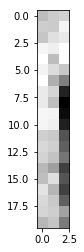

In [6]:
plt.imshow(cw1[:,:,0,0], cmap='Greys_r')

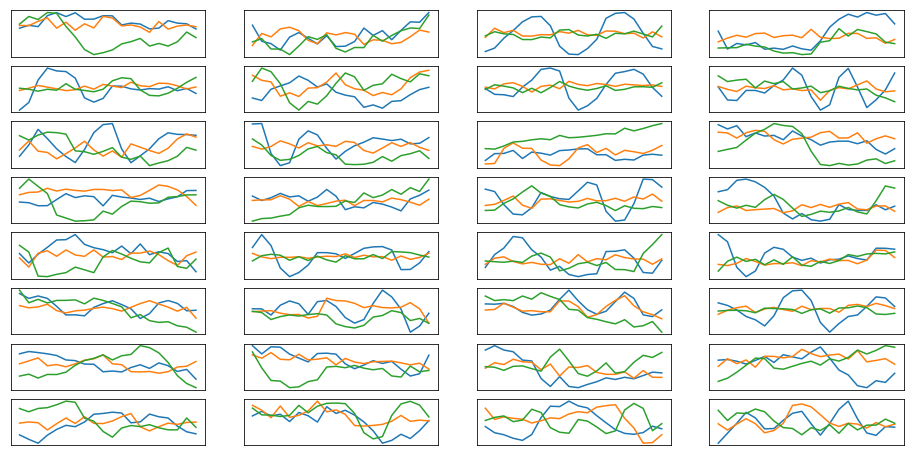

In [7]:
plt.figure(figsize=(16,8))
for i in range(cw1.shape[3]):
    plt.subplot(8,4,i+1)
    plt.plot(cw1[:,:,0,i])
    plt.yticks([])
    plt.xticks([])

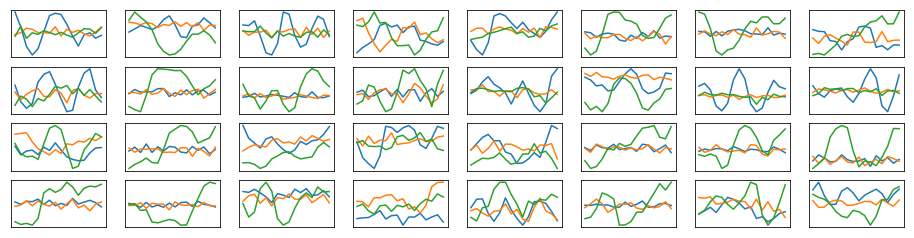

In [8]:
plt.figure(figsize=(16,4))
for i in range(cw2.shape[3]):
    plt.subplot(4,8,i+1)
    plt.plot(cw2[:,:,0,i])
    plt.yticks([])
    plt.xticks([])

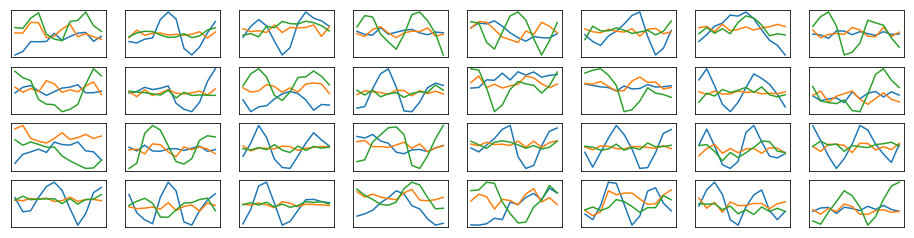

In [9]:
plt.figure(figsize=(16,4))
for i in range(cw3.shape[3]):
    plt.subplot(4,8,i+1)
    plt.plot(cw3[:,:,0,i])
    plt.yticks([])
    plt.xticks([])

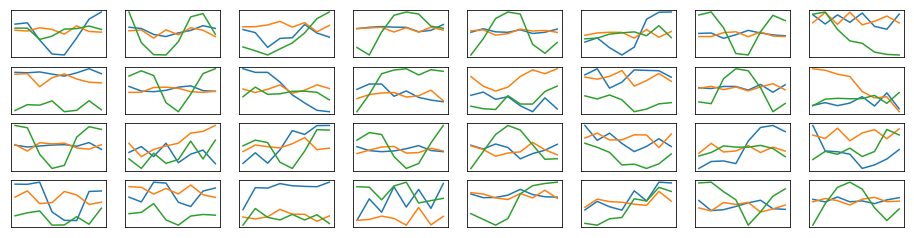

In [10]:
plt.figure(figsize=(16,4))
for i in range(cw4.shape[3]):
    plt.subplot(4,8,i+1)
    plt.plot(cw4[:,:,0,i])
    plt.yticks([])
    plt.xticks([])

(3, 1, 32, 64)


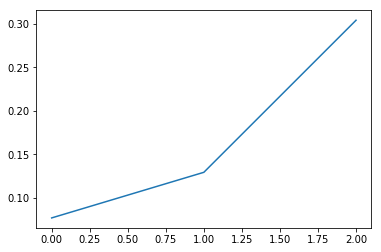

In [11]:
cw5 = model.get_weights()[8]
cw6 = model.get_weights()[10]
cw7 = model.get_weights()[12]
cw8 = model.get_weights()[14]
print(cw5.shape)
plt.plot(cw5[:,:,0,0])

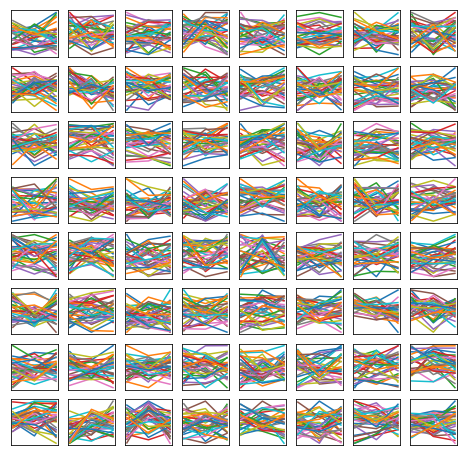

In [12]:
plt.figure(figsize=(8,8))
for i in range(cw5.shape[3]):
    plt.subplot(8,8,i+1)
    plt.plot(cw5[:,0,:,i])
    plt.yticks([])
    plt.xticks([])

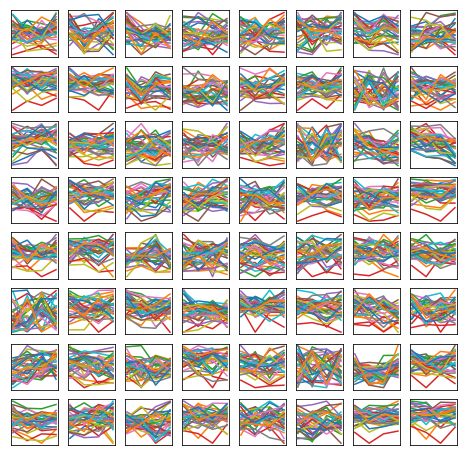

In [13]:
plt.figure(figsize=(8,8))
for i in range(cw6.shape[3]):
    plt.subplot(8,8,i+1)
    plt.plot(cw6[:,0,:,i])
    plt.yticks([])
    plt.xticks([])

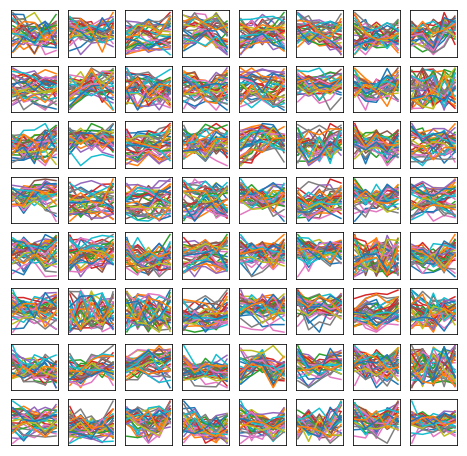

In [14]:
plt.figure(figsize=(8,8))
for i in range(cw7.shape[3]):
    plt.subplot(8,8,i+1)
    plt.plot(cw7[:,0,:,i])
    plt.yticks([])
    plt.xticks([])

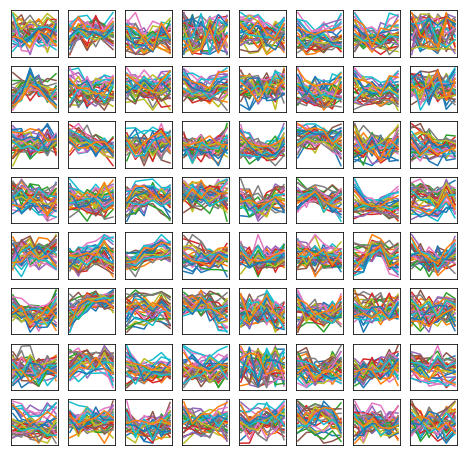

In [15]:
plt.figure(figsize=(8,8))
for i in range(cw8.shape[3]):
    plt.subplot(8,8,i+1)
    plt.plot(cw8[:,0,:,i])
    
    
    plt.yticks([])
    plt.xticks([])

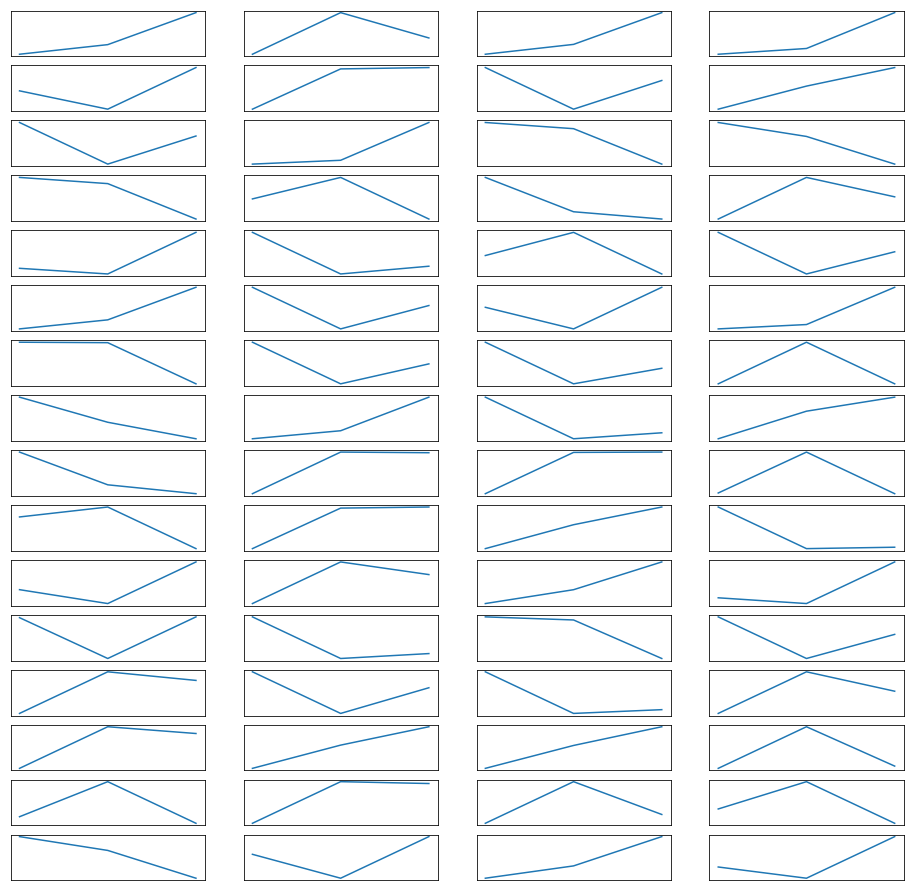

In [16]:
plt.figure(figsize=(16,16))
for i in range(cw5.shape[3]):
    plt.subplot(16,4,i+1)
    plt.plot(cw5[:,0,0,i])
    plt.yticks([])
    plt.xticks([])

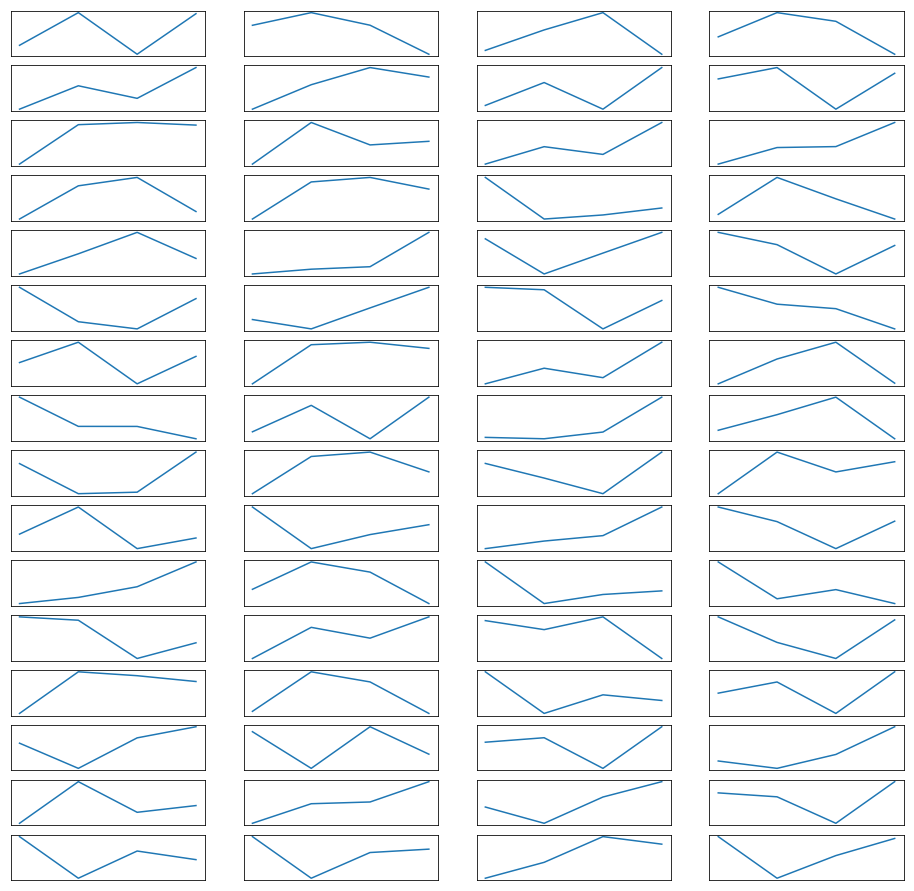

In [17]:
plt.figure(figsize=(16,16))
for i in range(cw6.shape[3]):
    plt.subplot(16,4,i+1)
    plt.plot(cw6[:,0,0,i])
    plt.yticks([])
    plt.xticks([])

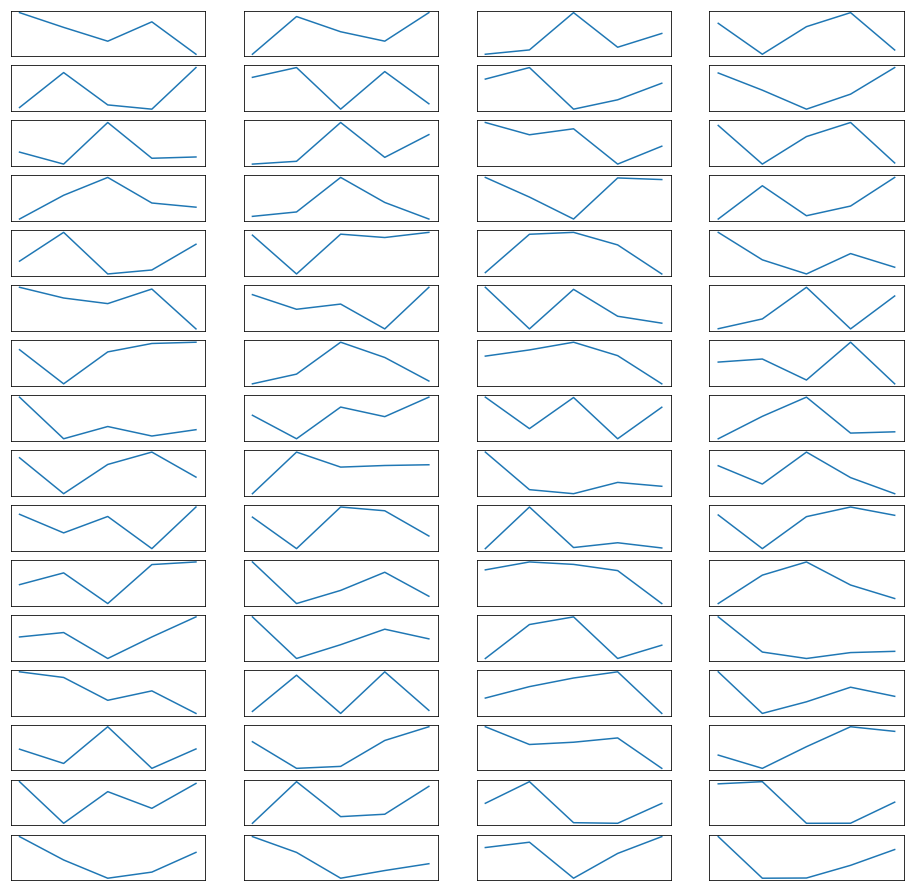

In [18]:
plt.figure(figsize=(16,16))
for i in range(cw7.shape[3]):
    plt.subplot(16,4,i+1)
    plt.plot(cw7[:,0,0,i])
    plt.yticks([])
    plt.xticks([])

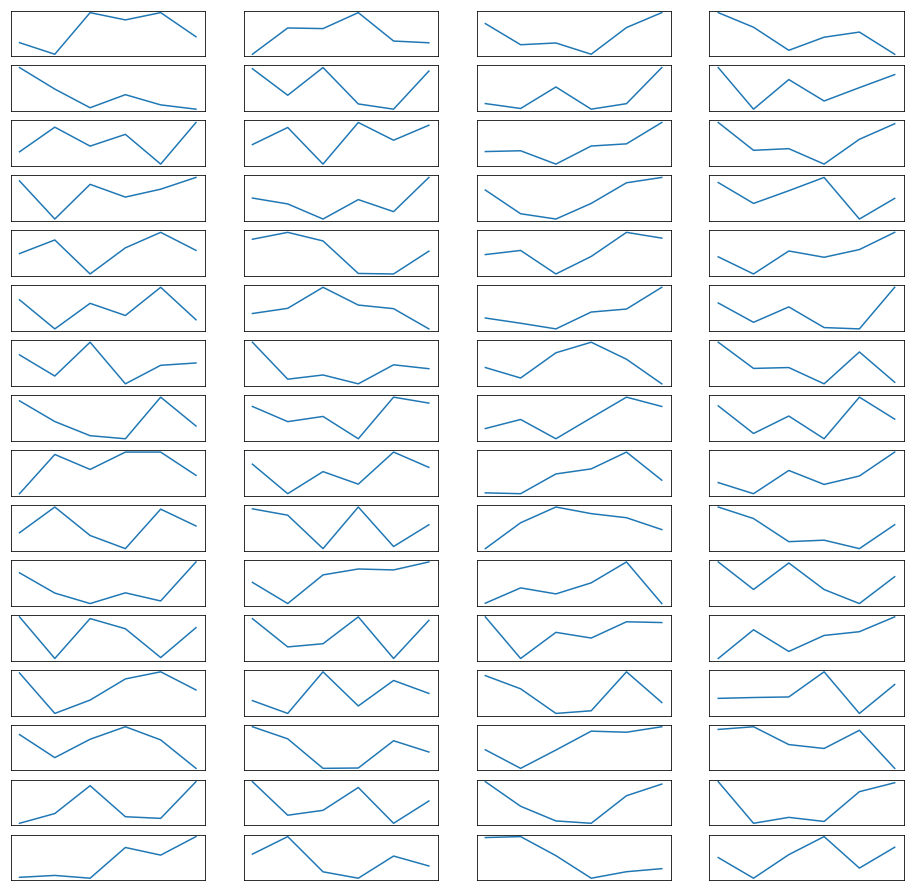

In [19]:
plt.figure(figsize=(16,16))
for i in range(cw8.shape[3]):
    plt.subplot(16,4,i+1)
    plt.plot(cw8[:,0,0,i])
    plt.yticks([])
    plt.xticks([])

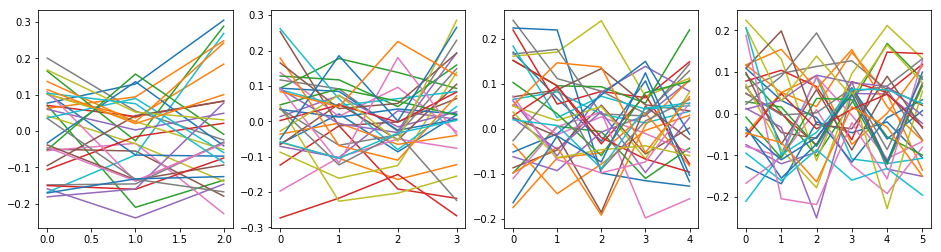

In [20]:
plt.figure(figsize=(16,4))
plt.subplot(1,4,1)
plt.plot(cw5[:,0,:,0])

plt.subplot(1,4,2)
plt.plot(cw6[:,0,:,0])

plt.subplot(1,4,3)
plt.plot(cw7[:,0,:,0])

plt.subplot(1,4,4)
plt.plot(cw8[:,0,:,0])

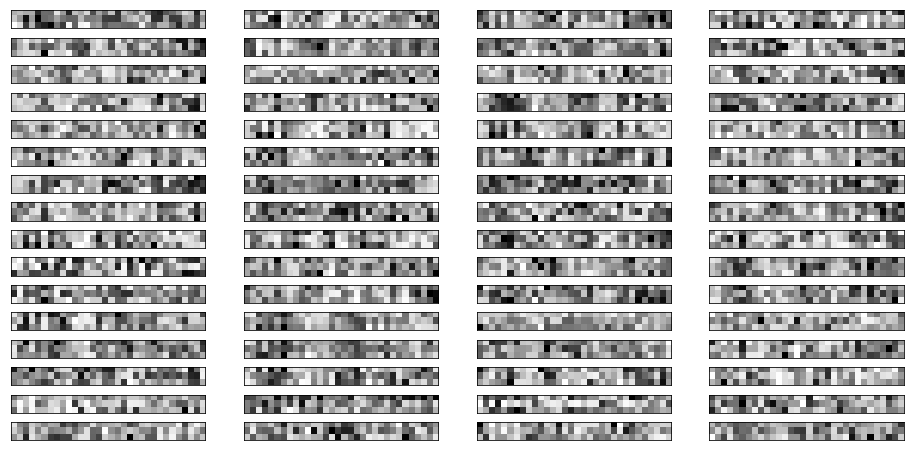

In [21]:
plt.figure(figsize=(16,8))
for i in range(cw8.shape[3]):
    plt.subplot(16,4,i+1)
    plt.yticks([])
    plt.xticks([])
    plt.imshow(cw5[:,0,:,i], cmap='Greys_r')

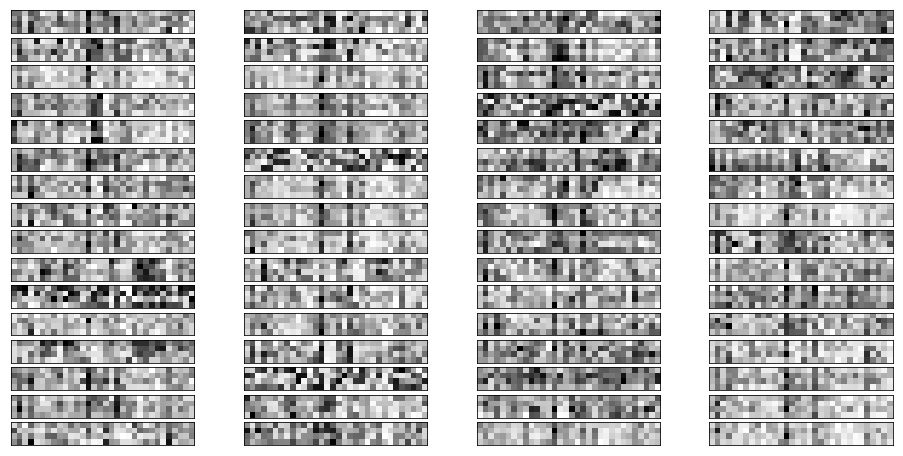

In [22]:
plt.figure(figsize=(16,8))
for i in range(cw8.shape[3]):
    plt.subplot(16,4,i+1)
    plt.yticks([])
    plt.xticks([])
    plt.imshow(cw6[:,0,:,i], cmap='Greys_r')

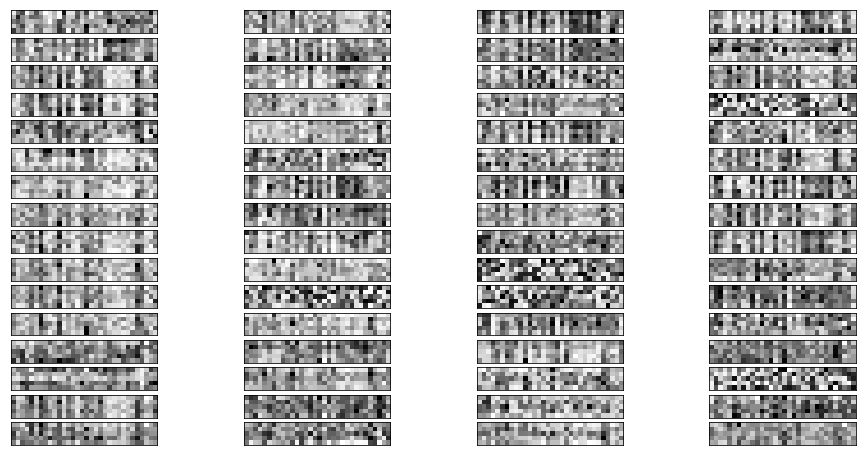

In [23]:
plt.figure(figsize=(16,8))
for i in range(cw8.shape[3]):
    plt.subplot(16,4,i+1)
    plt.yticks([])
    plt.xticks([])
    plt.imshow(cw7[:,0,:,i], cmap='Greys_r')

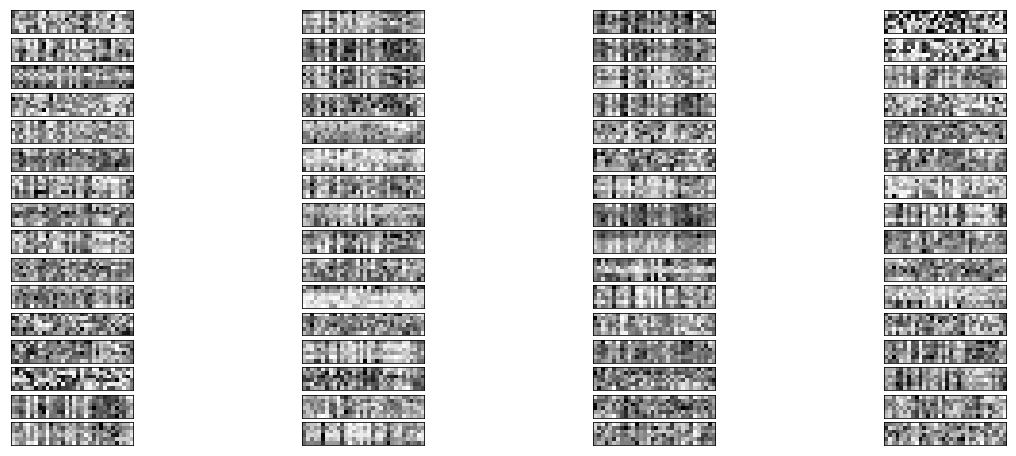

In [24]:
plt.figure(figsize=(20,8))
for i in range(cw8.shape[3]):
    plt.subplot(16,4,i+1)
    plt.yticks([])
    plt.xticks([])
    plt.imshow(cw8[:,0,:,i], cmap='Greys_r')